### CL-I Assignment No. 6
#### Name:Parkale Shreya Jagdish
#### Roll No.: 2447060
#### Batch : C
#### Reinforcement Learning:
Implement Reinforcement Learning using an example of a maze environment that the 
agent needs to explore. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Define the maze environment
maze = np.array([
    [0, -1, 0, 0, 0, 0, 1],  # 1 is the goal, -1 are obstacles, 0 are free cells
    [0, -1, 0, -1, 0, -1, -1],
    [0, 0, 0, -1, 0, 0, 0],
    [-1, -1, 0, -1, 0, -1, 0],
    [0, 0, 0, 0, 0, -1, 0]
])

In [3]:
# Parameters
num_episodes = 1000
learning_rate = 0.1  # alpha
discount_factor = 0.9  # gamma
epsilon = 0.1  # exploration rate
actions = ['up', 'down', 'left', 'right']


In [4]:
# Maze dimensions
rows, cols = maze.shape

In [5]:
# Q-table initialization (rows * cols * num_actions)
Q_table = np.zeros((rows, cols, len(actions)))

In [6]:
# Define movements
def move(state, action):
    row, col = state
    if action == 'up':
        row = max(0, row - 1)
    elif action == 'down':
        row = min(rows - 1, row + 1)
    elif action == 'left':
        col = max(0, col - 1)
    elif action == 'right':
        col = min(cols - 1, col + 1)
    return (row, col)

In [7]:
# Choose action based on epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        return random.choice(actions)  # Explore: random action
    else:
        row, col = state
        return actions[np.argmax(Q_table[row, col])]  # Exploit: best known action

In [8]:
# Train Q-learning agent
for episode in range(num_episodes):
    state = (0, 0)  # Start state
    while True:
        row, col = state
        if maze[row, col] == 1:  # Goal state
            break
        action = choose_action(state)
        next_state = move(state, action)
        next_row, next_col = next_state

        # Reward system
        if maze[next_row, next_col] == 1:
            reward = 10  # Reached goal
        elif maze[next_row, next_col] == -1:
            reward = -5  # Hit obstacle
        else:
            reward = -1  # Regular step

        # Q-value update (Q-learning formula)
        current_q = Q_table[row, col, actions.index(action)]
        max_future_q = np.max(Q_table[next_row, next_col])  # Best Q-value for next state
        new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount_factor * max_future_q)
        Q_table[row, col, actions.index(action)] = new_q

        # Move to the next state
        state = next_state

In [9]:
# Display the learned Q-table for each state and action
print("Q-table after training:")
print(Q_table)

Q-table after training:
[[[-3.13105652 -2.25159022 -3.22609886 -2.53557237]
  [-2.15791552 -1.46905298 -1.21816348  3.11602738]
  [ 2.97392257  1.71856719 -2.28508814  4.58      ]
  [ 4.42283478 -1.0599596   2.89934072  6.2       ]
  [ 5.95409213  3.96805323  4.10353478  8.        ]
  [ 7.5873546   1.06120773  5.61907564 10.        ]
  [ 0.          0.          0.          0.        ]]

 [[-3.17782573 -1.3906558  -2.49826955 -3.59268612]
  [-1.66868051 -1.22433264 -1.70342465  1.80047257]
  [ 3.122       0.43036557 -3.50094077 -1.2385811 ]
  [ 4.56681503 -1.74792324  0.27054243 -0.23114545]
  [ 6.04968426 -0.55609051 -0.5657928  -0.68129604]
  [ 7.6906121  -0.24222733 -0.1        -0.41      ]
  [ 2.71        0.          0.          0.        ]]

 [[-2.43136316 -5.8884232  -1.52627887 -0.434062  ]
  [-3.47932689 -5.33258536 -1.62276877  0.62882   ]
  [ 1.8098     -0.94928721 -0.59979673 -4.52471293]
  [-0.96730828 -1.01207688  0.51799017 -0.60937853]
  [ 0.20840219 -0.91050817 -0.96791 

In [10]:
# Function to visualize the path taken by the agent
def visualize_path():
    state = (0, 0)
    path = [state]
    while state != (0, 6):  # Goal state
        row, col = state
        action = actions[np.argmax(Q_table[row, col])]
        next_state = move(state, action)
        path.append(next_state)
        state = next_state
    return path

In [11]:
# Visualize the path found by the agent
path = visualize_path()
print("Path found by the agent:")
print(path)

Path found by the agent:
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]


In [12]:
# Plot the maze and path
def plot_maze(maze, path):
    plt.imshow(maze, cmap='coolwarm', interpolation='none')
    path_x = [p[1] for p in path]
    path_y = [p[0] for p in path]
    plt.plot(path_x, path_y, color='black', marker='o', linestyle='-', linewidth=2, markersize=8)
    plt.show()

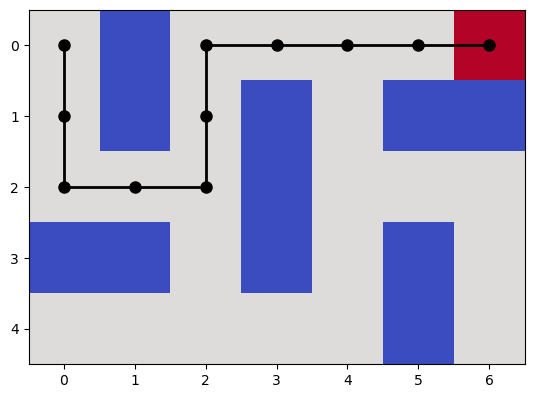

In [13]:
plot_maze(maze, path)